#### Import Files

In [1]:
# Importing Files
import os
import random
import sys
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neural_network import MLPClassifier

%matplotlib inline

#### Reading the dataset

In [2]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

#### Understanding the fields

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [60]:
# Data Distribution
No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])
print("The number of fraudulent transactions( Class 1) are: ", No_of_frauds)
print("The number of normal transactions( Class 0) are: ", No_of_normals)
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

The number of fraudulent transactions( Class 1) are:  492
The number of normal transactions( Class 0) are:  284315
Class 0 percentage =  99.82725143693798
Class 1 percentage =  0.1727485630620034


In [61]:
# Splitting into data and output columns
from sklearn.utils import shuffle
data = shuffle(data)
input_data = data.loc[:, :'Amount']
output_data = data.loc[:, 'Class':]

#### Breaking the data into training and test sets

In [62]:
# Number of records 
len(data)

284807

In [63]:
# Splitting 280000 into training and 4807 into testing
train_data = input_data.loc[:280000, :]
train_labels = output_data.loc[:280000, :]

test_data = input_data.loc[280000:, :]
test_labels = output_data.loc[280000:, :]

# Applying Classification without any preprocessing

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Creating the classifiers

In [65]:
clf_randomforest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [66]:
clf_neuralnet = MLPClassifier(alpha=1)

In [67]:
clf_knearest = KNeighborsClassifier(3)

#### Training the models

In [68]:
clf_randomforest.fit(train_data, np.ravel(train_labels))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
clf_neuralnet.fit(train_data, np.ravel(train_labels))

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [70]:
clf_knearest.fit(train_data, np.ravel(train_labels))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Getting Scores

In [71]:
score_randomforest = clf_randomforest.score(test_data, test_labels)

In [72]:
score_neuralnet = clf_neuralnet.score(test_data, test_labels)

In [73]:
score_knearest = clf_knearest.score(test_data, test_labels)

In [74]:
print("Random Forest\t",end = "")
print(score_randomforest)

print("Neural Network\t", end="")
print(score_neuralnet)

print("K Nearest Neighbours\t", end="")
print(score_knearest)

Random Forest	0.9987728555651
Neural Network	0.998269726346791
K Nearest Neighbours	0.9981633738290997


In [75]:
unproc_res = [score_randomforest, score_neuralnet, score_knearest]

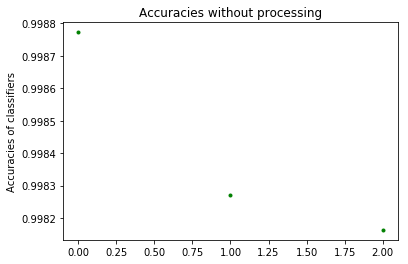

In [76]:
import matplotlib.pyplot as plt
plt.plot(unproc_res, '.g')
plt.ylabel('Accuracies of classifiers')
plt.title('Accuracies without processing')
plt.show()


# Applying different processing techniques for Handling Imbalanced Datasets

### 1. Undersampling

In [77]:
#list of fraud indices
fraud_index= np.array(data[data["Class"]==1].index)

#getting the list of normal indices from the full dataset
normal_index= data[data["Class"]==0].index

#choosing random normal indices equal to the number of fraudulent transactions
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
random_normal_indices= np.array(random_normal_indices)

# concatenate fraud index and normal index to create a list of indices
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])

#use the undersampled indices to build the undersampled_data dataframe
undersampled_data= data.iloc[undersampled_indices, :]


In [78]:
len(undersampled_data)

984

In [79]:
sc= StandardScaler()
undersampled_data["scaled_Amount"]=  sc.fit_transform(undersampled_data.iloc[:,29].values.reshape(-1,1))
undersampled_data= undersampled_data.drop(["Time","Amount"], axis= 1)
X= undersampled_data.iloc[:, undersampled_data.columns != "Class"].values
y= undersampled_data.iloc[:, undersampled_data.columns == "Class"].values

from sklearn.utils import shuffle
X, y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 0)

/home/prodigal-son/miniconda2/envs/sim/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
clf_randomforest_hyb = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [81]:
clf_randomforest_hyb.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
y_pred = clf_randomforest_hyb.predict(X_test)
accuracies = cross_val_score(estimator = clf_randomforest_hyb, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

/home/prodigal-son/miniconda2/envs/sim/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The mean accuracy in %:  99.77777777777777
The standard deviation in %  0.44444444444444287


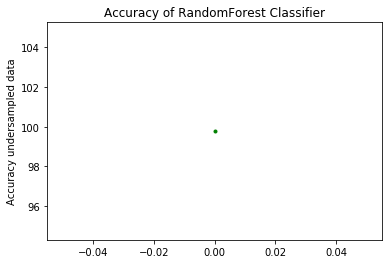

In [83]:
plt.plot(mean_accuracy, '.g')
plt.ylabel('Accuracy undersampled data')
plt.title('Accuracy of RandomForest Classifier')
plt.show()

#### Fitting Support Vector Classifier

In [84]:
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

The mean accuracy in %:  99.77777777777777
The standard deviation in %  0.44444444444444287


/home/prodigal-son/miniconda2/envs/sim/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


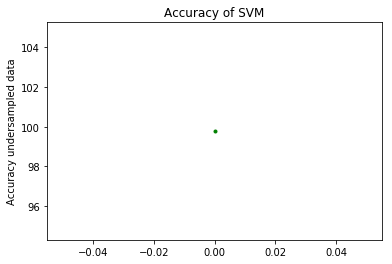

In [86]:
plt.plot(mean_accuracy, '.g')
plt.ylabel('Accuracy undersampled data')
plt.title('Accuracy of SVM')
plt.show()

### 2> Oversampling

In [87]:
len(data)

284807

In [88]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Sorting the data in descending order

In [89]:
res = data.sort_values('Class', ascending=[0])

In [90]:
res['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [91]:
# Adding 480 rows with fraud transactions to oversampled dataset
oversampled_data = res.iloc[:480, :]

In [92]:
res['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [93]:
# Picking 480 random incides from the random data
ind = random.sample(range(492, 284807), 480)

# Adding 480 rows of non-fraduenlent transactions
normal_transactions = res.iloc[ind , :]

In [94]:
total_data = pd.concat([oversampled_data, normal_transactions])
total_data['Class'].value_counts()

1    480
0    480
Name: Class, dtype: int64

#### Diving the dataset into input and output columns

In [95]:
X= total_data.iloc[:, total_data.columns != "Class"].values
y= total_data.iloc[:, total_data.columns == "Class"].values

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [97]:
sc= StandardScaler()

In [98]:
sc= StandardScaler()
total_data["scaled_Amount"]=  sc.fit_transform(total_data.iloc[:,29].values.reshape(-1,1))
#total_data= total_data.drop(["Time","Amount"], axis= 1)
X= total_data.iloc[:, total_data.columns != "Class"].values
y= total_data.iloc[:, total_data.columns == "Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

#### Random Forest

In [99]:
clf_randomforest_hyb = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [100]:
clf_randomforest_hyb.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
y_pred = clf_randomforest_hyb.predict(X_test)
accuracies = cross_val_score(estimator = clf_randomforest_hyb, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

The mean accuracy in %:  92.21788110703797
The standard deviation in %  2.2627842176771527


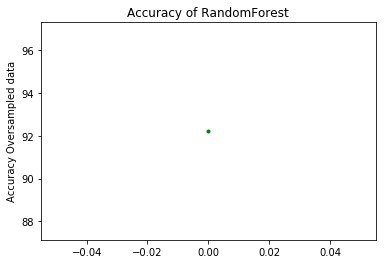

In [102]:
plt.plot(mean_accuracy, '.g')
plt.ylabel('Accuracy Oversampled data')
plt.title('Accuracy of RandomForest')
plt.show()

### Support Vector Classifier

In [103]:
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

The mean accuracy in %:  54.02608956631724
The standard deviation in %  1.9079657392709497


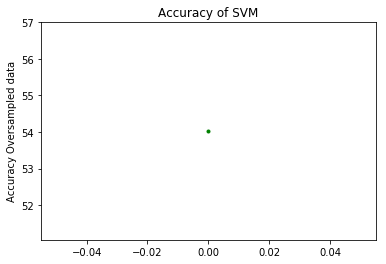

In [105]:
plt.plot(mean_accuracy, '.g')
plt.ylabel('Accuracy Oversampled data')
plt.title('Accuracy of SVM')
plt.show()

### 3> Synthetic Data Generation

In [106]:
res['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [107]:
minority_fit = res['Class'].iloc[:400]

#### Fitting in a linear regression equation, to get an equation of data

In [108]:
# Linear Regression
clf = MLPClassifier(alpha=1)

In [109]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.575


/home/prodigal-son/miniconda2/envs/sim/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
syn_data = clf.predict(X_test)

In [111]:
syn_data

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Getting indices of the data, classified as 1 by the network

In [112]:
syn_indices = []

for i in range(len(syn_data)):
    if(syn_data[i] == 1):
        syn_indices.append(i)

#### Adding noise to the data

In [113]:
new_syn_data = []
for i in syn_indices:
    n = X_test[i] + (random.randint(-1, 1)) * 0.0005   
    n = np.insert(n, len(n), 1)
     
    new_syn_data.append(n)

### Output of the new synthetic data

In [114]:
new_syn_data

[array([ 8.40799950e+03, -1.81378048e+00,  4.91735071e+00, -5.92662969e+00,
         5.70100043e+00,  1.20389257e+00, -3.03563755e+00, -1.71390206e+00,
         5.60757391e-01, -3.79685425e+00, -7.45534065e+00,  7.38755512e+00,
        -1.04757287e+01, -3.79814527e-01, -1.17372291e+01, -2.08748895e+00,
        -2.44285398e+00, -3.53602351e+00,  1.29860307e-01, -2.07195049e+00,
         5.76156033e-01,  6.15141835e-01, -4.06927275e-01, -7.37518076e-01,
        -2.80141772e-01,  1.10626637e+00,  3.23385478e-01,  8.94266672e-01,
         5.69018600e-01,  9.99500000e-01, -4.17361484e-01,  1.00000000e+00]),
 array([ 8.87799950e+03, -2.66230217e+00,  5.85589321e+00, -7.65411621e+00,
         6.37924188e+00, -6.12121191e-02, -3.13204973e+00, -3.10406975e+00,
         1.77799157e+00, -3.83165372e+00, -7.19210425e+00,  7.10248859e+00,
        -9.92919994e+00, -6.79983775e-02, -1.09246869e+01, -1.69841398e+00,
        -2.37992099e+00, -2.77561390e+00,  2.73298971e-01, -1.38268756e+00,
         3

### Hybrid Classification

### 1. Classifier Ensemble

#### A> On orignal data

In [115]:
# We use 3 classifiers for 3 different sections of data, training and testing
# Then we fit them all together using a Logistic Regression to give the final classification

In [116]:
# Number of rows for training
len(data)

284807

In [117]:

train_data_1 = input_data.loc[:100000, :]
train_labels_1 = output_data.loc[:100000, :]

test_data_1 = input_data.loc[280000:, :]
test_labels_1 = output_data.loc[280000:, :]


train_data_2 = input_data.loc[100000:200000, :]
train_labels_2 = output_data.loc[100000:200000, :]

test_data_2 = input_data.loc[280000:, :]
test_labels_2 = output_data.loc[280000:, :]



train_data_3 = input_data.loc[200000:280000, :]
train_labels_3 = output_data.loc[200000:280000, :]

test_data_3 = input_data.loc[280000:, :]
test_labels_3 = output_data.loc[280000:, :]



In [118]:
clf_randomforest_hyb = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [119]:
clf_neuralnet_hyb = MLPClassifier(alpha=1)

In [120]:
clf_knearest_hyb = KNeighborsClassifier(3)

#### Training the different classifiers

In [121]:
clf_randomforest_hyb.fit(train_data_1, np.ravel(train_labels_1))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
clf_neuralnet_hyb.fit(train_data_2, np.ravel(train_labels_2))

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [123]:
clf_knearest_hyb.fit(train_data_2, np.ravel(train_labels_2))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Predicting the different results

In [124]:
res1 = clf_randomforest_hyb.predict(test_data_1)
res2 = clf_neuralnet_hyb.predict(test_data_2)
res3 = clf_knearest_hyb.predict(test_data_3)

In [125]:
ar_1 = np.asarray(res1)
ar_1.shape

(244470,)

In [126]:
ar_2 = np.asarray(res2)
ar_2.shape

(244470,)

In [127]:
ar_3 = np.asarray(res3)
ar_3.shape

(244470,)

#### Training a logistic regression for this data to act as the final prediction

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
ensemble_train_data = np.column_stack((res1,res2,res3))
ensemble_train_data.shape

(244470, 3)

In [130]:
ensemble_train_labels = test_labels_1
ensemble_train_labels.shape

(244470, 1)

In [131]:
ensemble_train_subset = ensemble_train_data[:4600]
ensemble_train_subset.shape

(4600, 3)

In [132]:
ensemble_train_subset_labels = ensemble_train_labels[:4600]
ensemble_train_subset_labels.shape

(4600, 1)

In [133]:
ensemble_test_subset = ensemble_train_data[4600:]
ensemble_test_subset.shape

(239870, 3)

In [134]:
ensemble_test_subset_labels = ensemble_train_labels[4600:]
ensemble_test_subset_labels.shape

(239870, 1)

In [135]:
logreg = LogisticRegression(C=1e5)

In [136]:
logreg.fit(ensemble_train_subset, ensemble_train_subset_labels)

/home/prodigal-son/miniconda2/envs/sim/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [137]:
final_res = logreg.predict(ensemble_test_subset)
len(final_res)

239870

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
acc_res = accuracy_score(ensemble_test_subset_labels, final_res)

In [140]:
print(acc_res)

0.9990286405136115


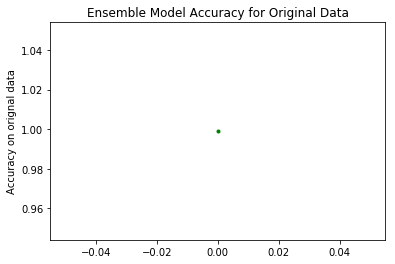

In [141]:
plt.plot(acc_res, '.g')
plt.ylabel('Accuracy on orignal data')
plt.title('Ensemble Model Accuracy for Original Data')
plt.show()

#### B> On Biased Sampling data 

In [142]:
newdata = res.iloc[:800]

In [143]:
from sklearn.utils import shuffle
newdata = shuffle(newdata)

In [144]:
new_output_data = newdata['Class'].iloc[:800]
len(new_output_data)

800

In [145]:
new_input_data = newdata.drop(['Class'], axis = 1)

In [146]:
new_input_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [147]:
len(new_output_data)

800

In [148]:
train_data_1 = new_input_data.iloc[:200]
train_labels_1 = new_output_data.iloc[:200]

test_data_1 = new_input_data.iloc[600:]
test_labels_1 = new_output_data.iloc[600:]


train_data_2 = new_input_data.iloc[200:400]
train_labels_2 = new_output_data.iloc[200:400]

test_data_2 = new_input_data.iloc[600:]
test_labels_2 = new_output_data.iloc[600:]



train_data_3 = new_input_data.iloc[400:600]
train_labels_3 = new_output_data.iloc[400:600]

test_data_3 = new_input_data.iloc[600:]
test_labels_3 = new_output_data.iloc[600:]


In [149]:
clf_randomforest_hyb = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [150]:
clf_neuralnet_hyb = MLPClassifier(alpha=1)

In [151]:
clf_knearest_hyb = KNeighborsClassifier(3)

In [152]:
clf_randomforest_hyb.fit(train_data_1, np.ravel(train_labels_1))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
clf_neuralnet_hyb.fit(train_data_2, np.ravel(train_labels_2))

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [154]:
clf_knearest_hyb.fit(train_data_3, np.ravel(train_labels_3))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [155]:
res1 = clf_randomforest_hyb.predict(test_data_1)
res2 = clf_neuralnet_hyb.predict(test_data_2)
res3 = clf_knearest_hyb.predict(test_data_3)

In [156]:
ar_1 = np.asarray(res1)
ar_1.shape

(200,)

In [157]:
ar_2 = np.asarray(res2)
ar_2.shape

(200,)

In [158]:
ar_3 = np.asarray(res3)
ar_3.shape

(200,)

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
ensemble_train_data = np.column_stack((res1,res2,res3))
ensemble_train_data.shape

(200, 3)

In [161]:
ensemble_train_labels = test_labels_1
ensemble_train_labels.shape

(200,)

In [162]:
ensemble_train_subset = ensemble_train_data[:200]
ensemble_train_subset.shape

(200, 3)

In [163]:
ensemble_train_subset_labels = ensemble_train_labels[:200]
ensemble_train_subset_labels.shape

(200,)

In [164]:
logreg = LogisticRegression(C=1e5)

In [165]:
logreg.fit(ensemble_train_subset, ensemble_train_subset_labels)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [166]:
ensemble_test_subset = ensemble_train_data[180:]
ensemble_test_subset.shape

(20, 3)

In [167]:
ensemble_test_subset_labels = ensemble_train_labels[180:]
ensemble_test_subset_labels.shape

(20,)

In [168]:
final_res = logreg.predict(ensemble_test_subset)
len(final_res)

20

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
acc_res = accuracy_score(ensemble_test_subset_labels, final_res)

In [171]:
print(acc_res)

0.95


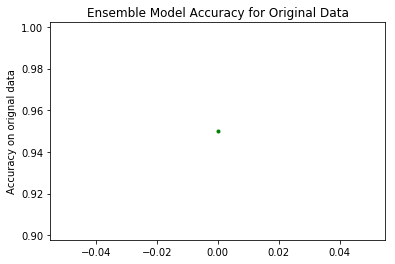

In [172]:
plt.plot(acc_res, '.g')
plt.ylabel('Accuracy on orignal data')
plt.title('Ensemble Model Accuracy for Original Data')
plt.show()

### Using Different Ensembles

#### Naive Bayes

In [173]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_1 = gnb.fit(train_data_1, train_labels_1).predict(test_data_1)
#print("Number of mislabeled points out of a total %d points : %d"% (train_data_1.shape[0],(test_labels_1 != y_pred).sum()))

#### Linear SVM

In [174]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC(random_state=0)
clf.fit(train_data_2, train_labels_2)

y_pred_2 = clf.predict(test_data_2)

#### Ada Boost Classifier

In [175]:
from sklearn.ensemble import AdaBoostClassifier

In [176]:
clf = AdaBoostClassifier()

In [177]:
clf.fit(train_data_3, train_labels_3)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [178]:
y_pred_3 = clf.predict(test_data_3)

In [179]:
clf = LogisticRegression(C=1e5)

In [180]:
ensemble_train_data = np.column_stack((y_pred_1,y_pred_2,y_pred_3))
ensemble_train_data.shape

(200, 3)

In [181]:
ensemble_train_subset = ensemble_train_data[:200]
ensemble_train_subset.shape

(200, 3)

In [182]:
ensemble_train_labels = test_labels_1
ensemble_train_labels.shape

(200,)

In [183]:
clf.fit(ensemble_train_data, ensemble_train_labels)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [184]:
ensemble_test_subset = ensemble_train_data[180:]
ensemble_test_subset.shape

(20, 3)

In [185]:
ensemble_test_subset_labels = ensemble_train_labels[180:]
ensemble_test_subset_labels.shape

(20,)

In [186]:
final_res = clf.predict(ensemble_test_subset)
len(final_res)

20

In [187]:
acc_res = accuracy_score(ensemble_test_subset_labels, final_res)

In [188]:
print(acc_res)

1.0


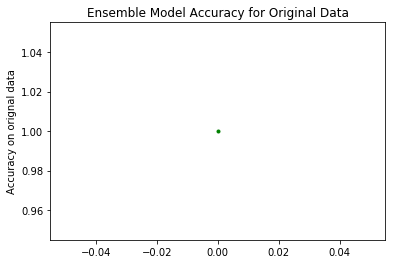

In [189]:
plt.plot(acc_res, '.g')
plt.ylabel('Accuracy on orignal data')
plt.title('Ensemble Model Accuracy for Original Data')
plt.show()